# Tree Trials
This notebook is used as a playground to try model ideas which are part of the tree ensemble category. They results might not be convincing enough or their runtime to slow to be considered further.

In [1]:
import os
import sys

from lineartree import LinearForestRegressor, LinearBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor
from joblib import load
from lce import LCERegressor

In [2]:
sys.path.insert(0, "../..")
import problem

## Load data

In [3]:
X_train, y_train = problem.get_train_data("../..")
X_test, y_test = problem.get_test_data("../..")

## LightGBM

In [5]:
from lightgbm import LGBMRegressor

In [14]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = ["year", "month", "weekday", "hour"]

add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)
add_date_cols = ["season"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]

categorical_cols = ["counter_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        (
            "date",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            date_cols + add_date_cols,
        ),
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
    ],
)

regressor = LGBMRegressor()

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fbd41ba40d0>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fbd41b9ef70>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fbd41ba4040>,
                                     kw_args={'dr...
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['year', 'month', 'weekday',
                                                   'hour', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['temp', 'dwpt', 'rhum',
                                                   'prcp', 'wspd', 'pres']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['counter_name', 'wdir'])])),
                ('lgbmregressor',
                 LGBMRegressor(bagging_fraction=0.7, max_depth=20))])

In [15]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.58
Test set, RMSE=0.56


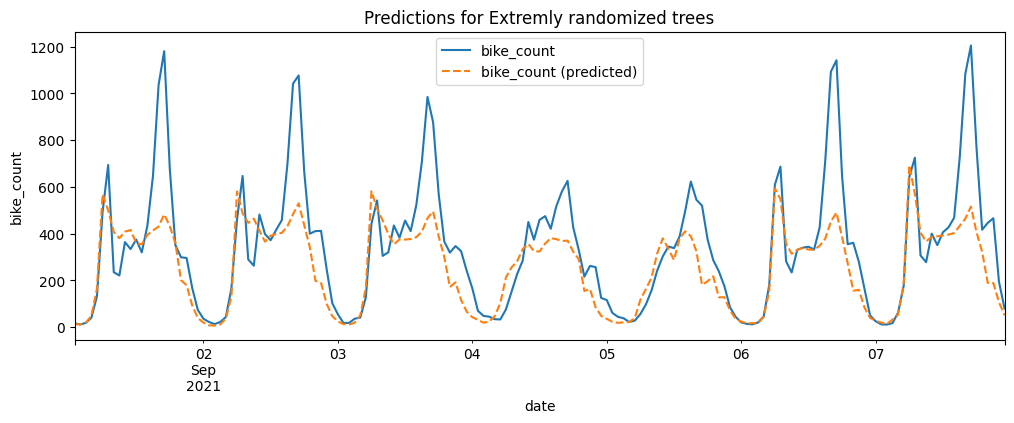

In [16]:
problem.week_plot(X_test, y_pred_test, y_test, "Ligth GBM")

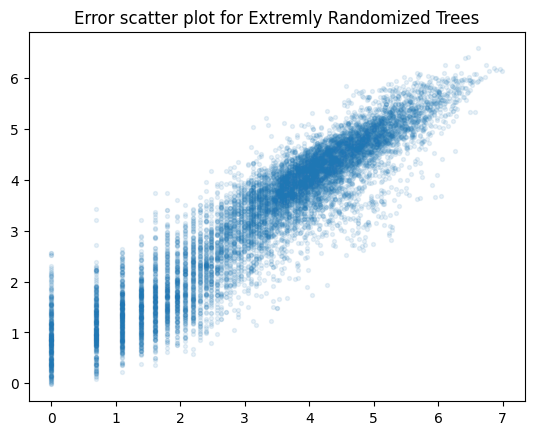

In [17]:
problem.error_plot(y_pred_test, y_test, "Light GBM")

## Catboost

In [4]:
from catboost import CatBoostRegressor

In [5]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = ["year", "month", "weekday", "hour"]

add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)
add_date_cols = ["season"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]

categorical_cols = ["counter_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        (
            "date",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            date_cols + add_date_cols,
        ),
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols),
    ],
)

regressor = CatBoostRegressor()

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

Learning rate set to 0.107689
0:	learn: 1.6001757	total: 162ms	remaining: 2m 41s
1:	learn: 1.5371004	total: 292ms	remaining: 2m 25s
2:	learn: 1.4860222	total: 417ms	remaining: 2m 18s
3:	learn: 1.4427488	total: 617ms	remaining: 2m 33s
4:	learn: 1.4053492	total: 764ms	remaining: 2m 32s
5:	learn: 1.3723866	total: 893ms	remaining: 2m 27s
6:	learn: 1.3459261	total: 997ms	remaining: 2m 21s
7:	learn: 1.3184409	total: 1.13s	remaining: 2m 19s
8:	learn: 1.2960474	total: 1.19s	remaining: 2m 11s
9:	learn: 1.2723235	total: 1.32s	remaining: 2m 11s
10:	learn: 1.2511257	total: 1.43s	remaining: 2m 8s
11:	learn: 1.2334238	total: 1.56s	remaining: 2m 8s
12:	learn: 1.2165623	total: 1.68s	remaining: 2m 7s
13:	learn: 1.1961455	total: 1.79s	remaining: 2m 6s
14:	learn: 1.1783326	total: 1.89s	remaining: 2m 4s
15:	learn: 1.1635179	total: 1.98s	remaining: 2m 1s
16:	learn: 1.1504393	total: 2.13s	remaining: 2m 3s
17:	learn: 1.1374630	total: 2.2s	remaining: 2m
18:	learn: 1.1261102	total: 2.34s	remaining: 2m
19:	lear

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fb2c9eb9820>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fb2c9eb9700>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fb2c9eb9790>,
                                     kw_args={'dr...
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['year', 'month', 'weekday',
                                                   'hour', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['temp', 'dwpt', 'rhum',
                                                   'prcp', 'wspd', 'pres']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['counter_name', 'wdir'])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fb2c9f42880>)])

In [6]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.47
Test set, RMSE=0.47


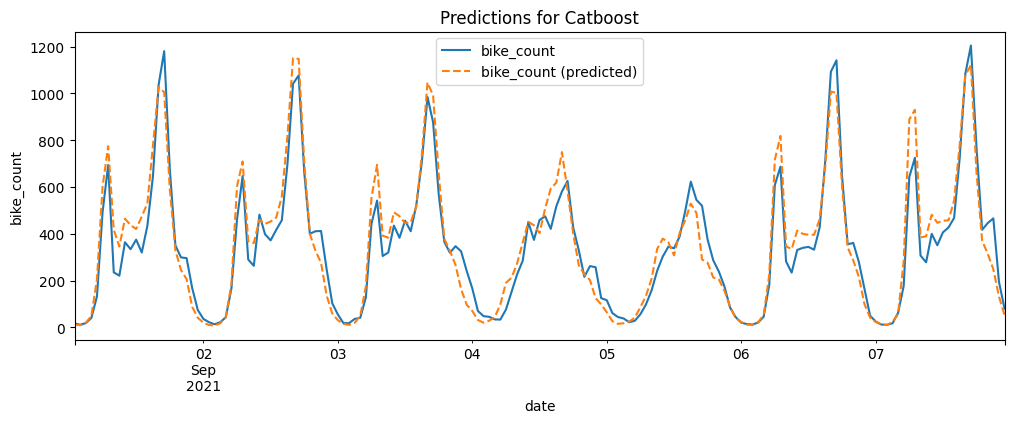

In [7]:
problem.week_plot(X_test, y_pred_test, y_test, "Catboost")

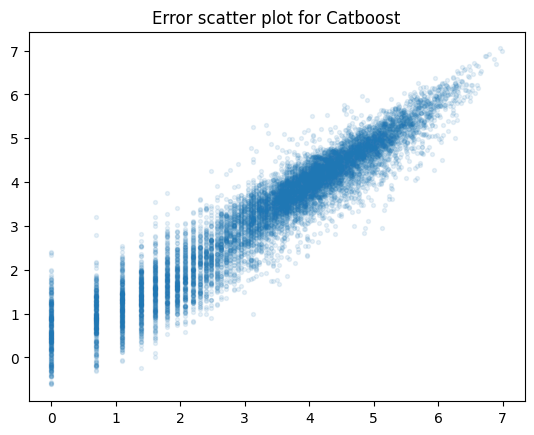

In [8]:
problem.error_plot(y_pred_test, y_test, "Catboost")

In [26]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)

categorical_feat = ["year", "month", "weekday", "hour", "season", "counter_name", "wdir"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]

regressor = CatBoostRegressor(iterations=1100)

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    FunctionTransformer(lambda x: x[num_cols + categorical_feat]),
    regressor,
)

pipe.fit(X_train, y_train, catboostregressor__cat_features=categorical_feat)

# ignored_features

Learning rate set to 0.099659
0:	learn: 1.5603474	total: 257ms	remaining: 4m 42s
1:	learn: 1.4598850	total: 422ms	remaining: 3m 51s
2:	learn: 1.3705724	total: 525ms	remaining: 3m 12s
3:	learn: 1.2913625	total: 613ms	remaining: 2m 47s
4:	learn: 1.2231674	total: 716ms	remaining: 2m 36s
5:	learn: 1.1637344	total: 850ms	remaining: 2m 35s
6:	learn: 1.1045720	total: 1.01s	remaining: 2m 38s
7:	learn: 1.0511732	total: 1.17s	remaining: 2m 40s
8:	learn: 1.0050399	total: 1.29s	remaining: 2m 36s
9:	learn: 0.9656850	total: 1.39s	remaining: 2m 31s
10:	learn: 0.9319638	total: 1.5s	remaining: 2m 28s
11:	learn: 0.8996800	total: 1.74s	remaining: 2m 38s
12:	learn: 0.8699882	total: 1.88s	remaining: 2m 37s
13:	learn: 0.8453856	total: 2.13s	remaining: 2m 45s
14:	learn: 0.8239273	total: 2.26s	remaining: 2m 43s
15:	learn: 0.8054613	total: 2.36s	remaining: 2m 39s
16:	learn: 0.7890895	total: 2.52s	remaining: 2m 40s
17:	learn: 0.7754474	total: 2.64s	remaining: 2m 38s
18:	learn: 0.7588126	total: 2.87s	remaining: 

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fb2c9eb9820>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fb2c9eb9700>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fb2c9eb9790>,
                                     kw_args={'drop_date': True})),
                ('functiontransformer-4',
                 FunctionTransformer(func=<function <lambda> at 0x7fb288356b80>)),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fb29b301eb0>)])

In [23]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.44
Test set, RMSE=0.45
